In [141]:
import pandas as pd
import missingno
import seaborn as sns
import pyecharts

pd.options.display.max_columns=99

In [207]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
from matplotlib.font_manager import FontProperties
myfont=FontProperties(fname=r'C:\Windows\Fonts\simhei.ttf',size=20)
sns.set(font=myfont.get_name(),style='white',font_scale=1.5)

In [51]:
data = pd.read_excel('./momo.xlsx')

In [54]:
data['月份'] = pd.to_datetime(data['月份'],format='%Y%m')

In [124]:
data

,净收入,净利润,MAU,直播收入,直播付费用户,付费用户人均消费,增值服务收入,增值服务用户数量,增值服务人均消费,广告业务收入,移动游戏收入,其他服务收入,营业成本,营业利润,EPS,总成本,Cost of revenues,研发费用,销售费用,管理费用,EBIT,EBIT Margin
月份,,,,,,,,,,,,,,,,,,,,,,
2015Q1,26.3,6.7,78.1,0.00,0.0,0.000000,13.0,3.1,4.193548,6.0,6.1,1.20,21.4,5.0,0.03,21.439,5.682,4.710,6.779,4.268,5.039,0.191597
2015Q2,30.7,1.7,78.4,0.00,0.0,0.000000,14.8,3.5,4.228571,6.7,7.7,1.50,31.4,-0.4,0.01,31.402,6.256,5.986,14.826,4.334,-0.441,-0.014365
2015Q3,37.5,-0.8,73.0,0.20,0.0,0.000000,16.0,3.3,4.848485,10.8,9.5,1.00,40.1,-2.5,0.00,40.101,8.580,6.046,18.673,6.802,-2.455,-0.065467
2015Q4,39.5,6.1,69.8,1.02,0.0,0.000000,14.6,2.9,5.034483,15.3,7.8,0.78,36.1,3.5,0.03,36.145,9.794,6.523,12.353,7.475,3.471,0.087873
2016Q1,50.9,7.1,72.3,15.60,0.0,0.000000,14.9,3.2,4.656250,12.4,7.4,0.60,46.1,4.9,0.03,46.149,20.230,6.890,12.522,6.570,4.927,0.096798
2016Q2,99.0,15.4,74.8,57.90,1.3,44.538462,15.6,3.2,4.875000,16.6,7.4,1.50,85.2,14.0,0.08,85.162,42.252,7.789,26.380,8.678,14.004,0.141455
2016Q3,157.0,39.0,77.4,108.60,2.6,41.769231,18.1,3.4,5.323529,17.7,9.3,3.30,120.0,37.2,0.19,120.003,68.762,8.987,29.876,12.378,37.198,0.236930
2016Q4,246.1,83.8,81.1,194.80,3.5,55.657143,19.1,3.5,5.457143,19.7,11.3,1.20,157.7,88.4,0.41,157.704,110.219,7.733,28.395,11.357,88.357,0.359029


In [56]:
data.set_index('月份',inplace=True)

In [64]:
data.resample('Q').sum().to_period('Q')

,净收入,净利润,MAU,直播收入,直播付费用户,付费用户人均消费,增值服务收入,增值服务用户数量,增值服务人均消费,广告业务收入,...,营业成本,营业利润,EPS,总成本,Cost of revenues,研发费用,销售费用,管理费用,EBIT,EBIT Margin
月份,,,,,,,,,,,,,,,,,,,,,
2015Q1,26.3,6.7,78.1,0.00,0.0,0.000000,13.0,3.1,4.193548,6.0,...,21.4,5.0,0.03,21.439,5.682,4.710,6.779,4.268,5.039,0.191597
2015Q2,30.7,1.7,78.4,0.00,0.0,0.000000,14.8,3.5,4.228571,6.7,...,31.4,-0.4,0.01,31.402,6.256,5.986,14.826,4.334,-0.441,-0.014365
2015Q3,37.5,-0.8,73.0,0.20,0.0,0.000000,16.0,3.3,4.848485,10.8,...,40.1,-2.5,0.00,40.101,8.580,6.046,18.673,6.802,-2.455,-0.065467
2015Q4,39.5,6.1,69.8,1.02,0.0,0.000000,14.6,2.9,5.034483,15.3,...,36.1,3.5,0.03,36.145,9.794,6.523,12.353,7.475,3.471,0.087873
2016Q1,50.9,7.1,72.3,15.60,0.0,0.000000,14.9,3.2,4.656250,12.4,...,46.1,4.9,0.03,46.149,20.230,6.890,12.522,6.570,4.927,0.096798
2016Q2,99.0,15.4,74.8,57.90,1.3,44.538462,15.6,3.2,4.875000,16.6,...,85.2,14.0,0.08,85.162,42.252,7.789,26.380,8.678,14.004,0.141455
2016Q3,157.0,39.0,77.4,108.60,2.6,41.769231,18.1,3.4,5.323529,17.7,...,120.0,37.2,0.19,120.003,68.762,8.987,29.876,12.378,37.198,0.236930
2016Q4,246.1,83.8,81.1,194.80,3.5,55.657143,19.1,3.5,5.457143,19.7,...,157.7,88.4,0.41,157.704,110.219,7.733,28.395,11.357,88.357,0.359029


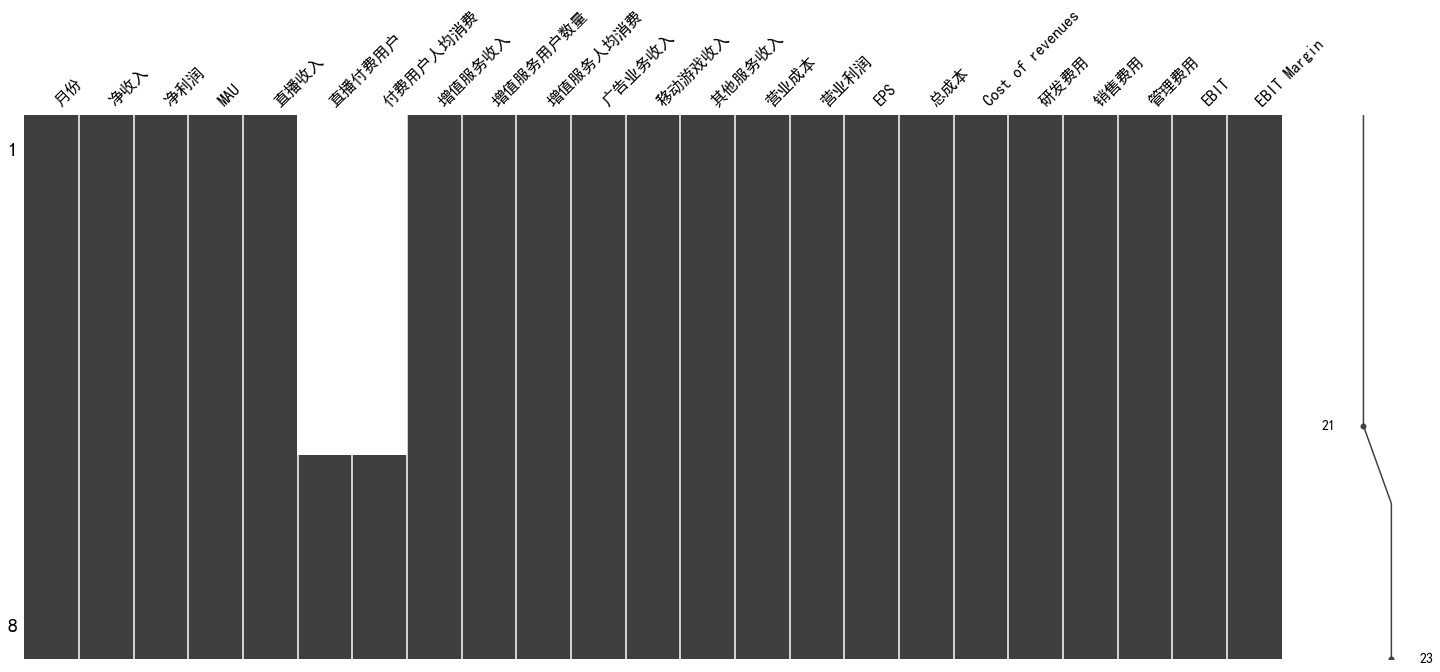

In [10]:
missingno.matrix(data)

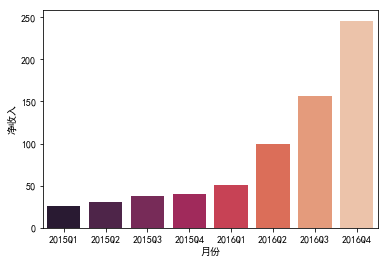

In [65]:
sns.barplot(data=data.resample('Q').sum().to_period('Q'),x=data.resample('Q').sum().to_period('Q').index,y='净收入',palette='rocket')

In [37]:
bar = Bar("柱状图数据堆叠示例")
bar.add("净收入",data.月份,data.净收入,is_label_show=True,xaxis_rotate=30)

In [80]:
list(filter(lambda x:x.find('收入')!=-1,data.columns))

['净收入', '直播收入', '增值服务收入', '广告业务收入', '移动游戏收入', '其他服务收入']

In [81]:
data=data.resample('Q').sum().to_period('Q')

In [82]:
data

,净收入,净利润,MAU,直播收入,直播付费用户,付费用户人均消费,增值服务收入,增值服务用户数量,增值服务人均消费,广告业务收入,...,营业成本,营业利润,EPS,总成本,Cost of revenues,研发费用,销售费用,管理费用,EBIT,EBIT Margin
月份,,,,,,,,,,,,,,,,,,,,,
2015Q1,26.3,6.7,78.1,0.00,0.0,0.000000,13.0,3.1,4.193548,6.0,...,21.4,5.0,0.03,21.439,5.682,4.710,6.779,4.268,5.039,0.191597
2015Q2,30.7,1.7,78.4,0.00,0.0,0.000000,14.8,3.5,4.228571,6.7,...,31.4,-0.4,0.01,31.402,6.256,5.986,14.826,4.334,-0.441,-0.014365
2015Q3,37.5,-0.8,73.0,0.20,0.0,0.000000,16.0,3.3,4.848485,10.8,...,40.1,-2.5,0.00,40.101,8.580,6.046,18.673,6.802,-2.455,-0.065467
2015Q4,39.5,6.1,69.8,1.02,0.0,0.000000,14.6,2.9,5.034483,15.3,...,36.1,3.5,0.03,36.145,9.794,6.523,12.353,7.475,3.471,0.087873
2016Q1,50.9,7.1,72.3,15.60,0.0,0.000000,14.9,3.2,4.656250,12.4,...,46.1,4.9,0.03,46.149,20.230,6.890,12.522,6.570,4.927,0.096798
2016Q2,99.0,15.4,74.8,57.90,1.3,44.538462,15.6,3.2,4.875000,16.6,...,85.2,14.0,0.08,85.162,42.252,7.789,26.380,8.678,14.004,0.141455
2016Q3,157.0,39.0,77.4,108.60,2.6,41.769231,18.1,3.4,5.323529,17.7,...,120.0,37.2,0.19,120.003,68.762,8.987,29.876,12.378,37.198,0.236930
2016Q4,246.1,83.8,81.1,194.80,3.5,55.657143,19.1,3.5,5.457143,19.7,...,157.7,88.4,0.41,157.704,110.219,7.733,28.395,11.357,88.357,0.359029


In [99]:
data_income = data[[ '直播收入', '增值服务收入', '广告业务收入', '移动游戏收入', '其他服务收入']]

data_income = data_income.stack().reset_index()


data_income.rename(columns={'level_1':'收入',0:'金额'},inplace=True)

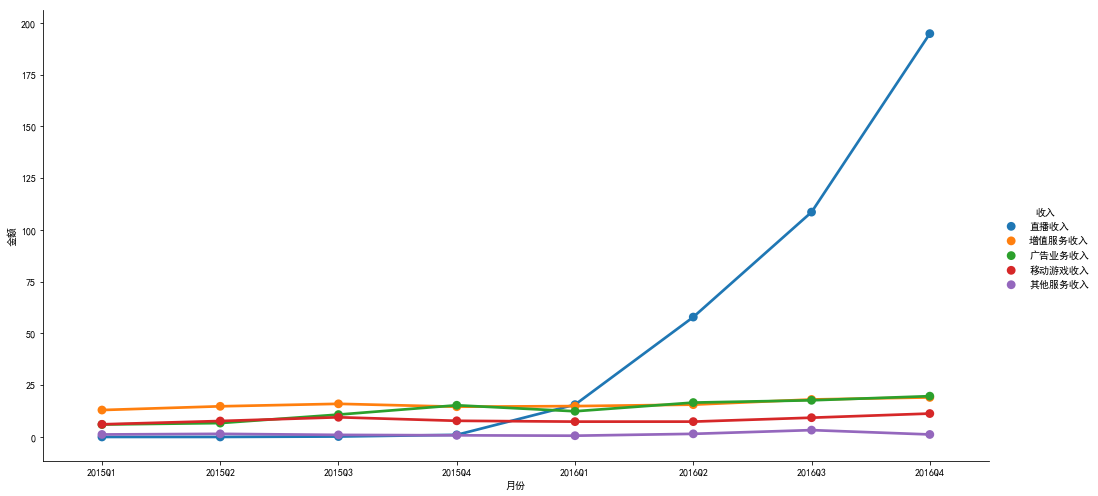

In [121]:
sns.catplot(data=data_income,x='月份',hue='收入',y='金额',kind='point',height=7,aspect=2)

In [111]:
data_income

,月份,收入,金额
0,2015Q1,直播收入,0.00
1,2015Q1,增值服务收入,13.00
2,2015Q1,广告业务收入,6.00
3,2015Q1,移动游戏收入,6.10
4,2015Q1,其他服务收入,1.20
5,2015Q2,直播收入,0.00
6,2015Q2,增值服务收入,14.80
7,2015Q2,广告业务收入,6.70
8,2015Q2,移动游戏收入,7.70
9,2015Q2,其他服务收入,1.50


In [122]:
data.columns

Index(['净收入', '净利润', 'MAU', '直播收入', '直播付费用户', '付费用户人均消费', '增值服务收入', '增值服务用户数量',
       '增值服务人均消费', '广告业务收入', '移动游戏收入', '其他服务收入', '营业成本', '营业利润', 'EPS', '总成本',
       'Cost of revenues', '研发费用', '销售费用', '管理费用', 'EBIT', 'EBIT Margin'],
      dtype='object')

In [150]:
data_zb = data[data['直播付费用户']!=0]
data_zb.reset_index(inplace=True)

In [135]:
data_zb['直播付费用户']/3/data_zb['MAU']*100

月份
2016Q2    0.579323
2016Q3    1.119724
2016Q4    1.438553
Freq: Q-DEC, dtype: float64

In [153]:
bar = pyecharts.Line()
bar.add("付费用户比例",data_zb.index,round(data_zb['直播付费用户']/3/data_zb['MAU']*100,2),is_label_show=True,xaxis_rotate=30)

In [177]:
line = pyecharts.Line()
line.add("付费用户比例",list(map(lambda x:str(x),data_zb['月份'])),round(data_zb['直播付费用户']/3/data_zb['MAU']*100,2),is_label_show=True,is_smooth=True,mark_line=['average'],mark_point=['average'])
line.add("付费用户人均消费",list(map(lambda x:str(x),data_zb['月份'])),round(data_zb['付费用户人均消费']/50,2),is_label_show=True,is_stack=True)

In [178]:
data

,净收入,净利润,MAU,直播收入,直播付费用户,付费用户人均消费,增值服务收入,增值服务用户数量,增值服务人均消费,广告业务收入,移动游戏收入,其他服务收入,营业成本,营业利润,EPS,总成本,Cost of revenues,研发费用,销售费用,管理费用,EBIT,EBIT Margin
月份,,,,,,,,,,,,,,,,,,,,,,
2015Q1,26.3,6.7,78.1,0.00,0.0,0.000000,13.0,3.1,4.193548,6.0,6.1,1.20,21.4,5.0,0.03,21.439,5.682,4.710,6.779,4.268,5.039,0.191597
2015Q2,30.7,1.7,78.4,0.00,0.0,0.000000,14.8,3.5,4.228571,6.7,7.7,1.50,31.4,-0.4,0.01,31.402,6.256,5.986,14.826,4.334,-0.441,-0.014365
2015Q3,37.5,-0.8,73.0,0.20,0.0,0.000000,16.0,3.3,4.848485,10.8,9.5,1.00,40.1,-2.5,0.00,40.101,8.580,6.046,18.673,6.802,-2.455,-0.065467
2015Q4,39.5,6.1,69.8,1.02,0.0,0.000000,14.6,2.9,5.034483,15.3,7.8,0.78,36.1,3.5,0.03,36.145,9.794,6.523,12.353,7.475,3.471,0.087873
2016Q1,50.9,7.1,72.3,15.60,0.0,0.000000,14.9,3.2,4.656250,12.4,7.4,0.60,46.1,4.9,0.03,46.149,20.230,6.890,12.522,6.570,4.927,0.096798
2016Q2,99.0,15.4,74.8,57.90,1.3,44.538462,15.6,3.2,4.875000,16.6,7.4,1.50,85.2,14.0,0.08,85.162,42.252,7.789,26.380,8.678,14.004,0.141455
2016Q3,157.0,39.0,77.4,108.60,2.6,41.769231,18.1,3.4,5.323529,17.7,9.3,3.30,120.0,37.2,0.19,120.003,68.762,8.987,29.876,12.378,37.198,0.236930
2016Q4,246.1,83.8,81.1,194.80,3.5,55.657143,19.1,3.5,5.457143,19.7,11.3,1.20,157.7,88.4,0.41,157.704,110.219,7.733,28.395,11.357,88.357,0.359029


In [193]:
data_spend_compa = data[['净收入','总成本']].reset_index()
data_spend_compa

,月份,净收入,总成本
0,2015Q1,26.3,21.439
1,2015Q2,30.7,31.402
2,2015Q3,37.5,40.101
3,2015Q4,39.5,36.145
4,2016Q1,50.9,46.149
5,2016Q2,99.0,85.162
6,2016Q3,157.0,120.003
7,2016Q4,246.1,157.704


In [194]:
line = pyecharts.Line()
line.add("净收入",list(map(lambda x:str(x),data_spend_compa['月份'])),round(data_spend['净收入'],1),is_label_show=True)
line.add("总成本",list(map(lambda x:str(x),data_spend_compa['月份'])),round(data_spend['总成本'],1),is_label_show=True)


In [ ]:
data_spend_compa = data[['净收入','总成本']].reset_index()
data_spend_compa

In [196]:
list(filter(lambda x:x.find('费用')!=-1,data.columns))

['直播付费用户', '付费用户人均消费', '研发费用', '销售费用', '管理费用']

In [212]:
data_spend = data[['Cost of revenues','研发费用', '销售费用', '管理费用']]
data_spend = data_spend.stack().reset_index()
data_spend.rename(columns={'level_1':'收入',0:'金额'},inplace=True)

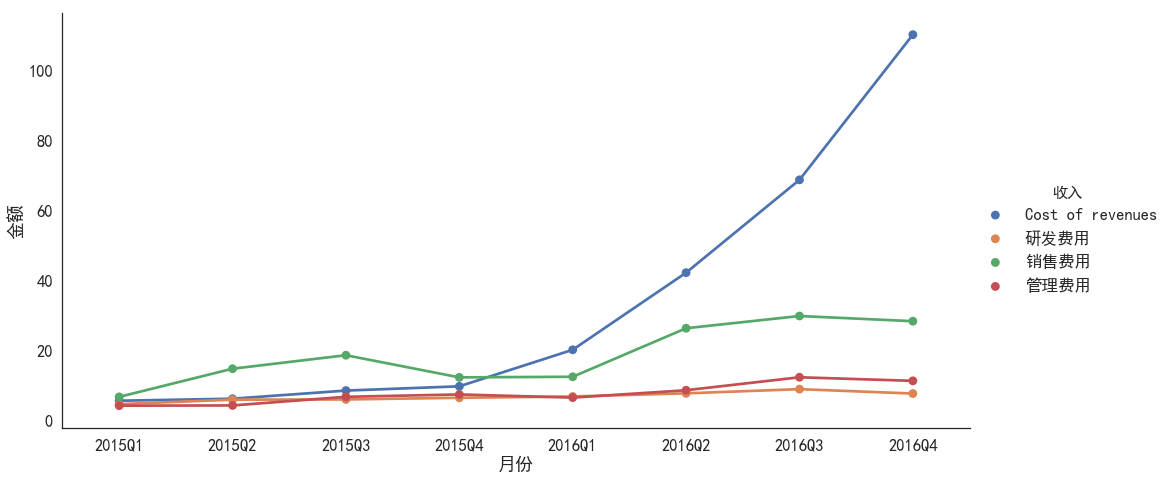

In [213]:
sns.catplot(data=data_spend,x='月份',y='金额',hue='收入',kind='point',height=7,aspect=2)

In [211]:
data.columns

Index(['净收入', '净利润', 'MAU', '直播收入', '直播付费用户', '付费用户人均消费', '增值服务收入', '增值服务用户数量',
       '增值服务人均消费', '广告业务收入', '移动游戏收入', '其他服务收入', '营业成本', '营业利润', 'EPS', '总成本',
       'Cost of revenues', '研发费用', '销售费用', '管理费用', 'EBIT', 'EBIT Margin'],
      dtype='object')

In [223]:
bar = Bar('盈利分析')
bar.add("RBIT",data.index,round(data['EBIT Margin']*100,2),is_label_show=True)